In [ ]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

In [ ]:
# Load data as Dataframes

df_1 =pd.read_csv('red_wines_clean.csv', sep=';', header=0, encoding_errors='replace', encoding='ansi')
df_2 =pd.read_csv('df_reds_cluster.csv', sep=',', header=0, encoding_errors='replace', encoding='ansi')


In [ ]:
df_1.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes
0,Podernuovo a Palazzone,Sotirio,4.3,75,32.90,Manzo / Agnello / Vitello,Italia,Toscana,Merlot,2011,56.4560,45.1866,3.85000,legno/Erbaceo/bacche nere
1,Gaja,Pieve Santa Restituta Sugarille Brunello di Mo...,4.3,27,179.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Brunello di Montalcino,Sangiovese,2016,52.7566,58.8874,10.60680,legno/Erbaceo/frutti rossi
2,Le Macchiole,Paleo,4.5,301,109.00,Manzo / Agnello / Vitello,Italia,Toscana,Cabernet Franc,2017,58.2530,49.4875,13.64230,legno/bacche nere/Erbaceo
3,Tenuta San Guido,Sassicaia,4.6,2174,569.25,Manzo / Pasta / Agnello,Italia,Bolgheri Sassicaia,Miscela,2000,62.0472,64.0325,10.29500,legno/bacche nere/Erbaceo
4,Elio Altare,Cerretta Barolo Riserva (Vigna Bricco),4.4,153,161.00,Manzo / Pasta / Agnello,Italia,Barolo,Nebbiolo,2013,63.0586,82.5967,7.25151,Erbaceo/legno/frutti rossi


In [ ]:
# Drop unecessary columns

df_2.drop(['Unnamed: 0', 'R', 'G', 'B'], axis=1, inplace=True)
df_2.head()

,Name,Clusters
0,(MozArt Wine) Brunello di Montalcino 2016'.png,3
1,110 e Lode Merlot 2015'.png,4
2,123 Brunello di Montalcino Riserva 2015'.png,3
3,16 Primitivo Gioia del Colle 2017'.png,3
4,17 Primitivo Gioia del Colle 2017'.png,1


In [ ]:
# Clean wine name

def clean_name(x):
    x = x.replace('\'.png', '')
    if x.split()[-1].isdigit():
        x = x.replace(x.split()[-1], '')
    else:
        x = x
    return x

In [ ]:
df_2['Name'] = df_2['Name'].apply(clean_name)
df_2.head()

,Name,Clusters
0,(MozArt Wine) Brunello di Montalcino,3
1,110 e Lode Merlot,4
2,123 Brunello di Montalcino Riserva,3
3,16 Primitivo Gioia del Colle,3
4,17 Primitivo Gioia del Colle,1


In [ ]:
# Merge the two dataframes

dfinal = df_1.merge(df_2, left_on='name', right_on='Name')
dfinal.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes,Name,Clusters
0,Podernuovo a Palazzone,Sotirio,4.3,75,32.90,Manzo / Agnello / Vitello,Italia,Toscana,Merlot,2011,56.4560,45.1866,3.8500,legno/Erbaceo/bacche nere,Sotirio,0
1,Gaja,Pieve Santa Restituta Sugarille Brunello di Mo...,4.3,27,179.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Brunello di Montalcino,Sangiovese,2016,52.7566,58.8874,10.6068,legno/Erbaceo/frutti rossi,Pieve Santa Restituta Sugarille Brunello di Mo...,2
2,Gaja,Pieve Santa Restituta Sugarille Brunello di Mo...,4.5,274,158.98,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Brunello di Montalcino,Sangiovese,2013,52.7566,58.8874,10.6068,legno/Erbaceo/frutti rossi,Pieve Santa Restituta Sugarille Brunello di Mo...,2
3,Le Macchiole,Paleo,4.5,301,109.00,Manzo / Agnello / Vitello,Italia,Toscana,Cabernet Franc,2017,58.2530,49.4875,13.6423,legno/bacche nere/Erbaceo,Paleo,7
4,Le Macchiole,Paleo,4.4,48,115.00,Manzo / Agnello / Vitello,Italia,Toscana,Cabernet Franc,2018,58.2531,49.4874,13.6239,legno/bacche nere/Erbaceo,Paleo,7


In [ ]:
info = dfinal.groupby(['Clusters', 'wine_type'], as_index=False)['price'].sum().sort_values(by='price', ascending=0)
info.set_index('Clusters').head(10)


,wine_type,price
Clusters,,
1,Sangiovese,121280.41
3,Sangiovese,75578.49
7,Sangiovese,59891.58
2,Nebbiolo,55522.70
0,Nebbiolo,48867.01
6,Sangiovese,42264.38
5,Sangiovese,41178.02
2,Sangiovese,40591.60
7,Merlot,39926.05


In [ ]:
types_aggr = dfinal.groupby('Clusters').mean()

In [ ]:
dict_colors = {0 : '#488f31', 1 : '#6f993b', 2: '#90a349', 3: '#aead5b', 4: '#c8b771', 5: '#dfc288', 6: '#f3cea1',  7: '#fcd7a9', 8: '#ffdfb2', 9: '#fac997', 10: '#f6b181', 11: '#f29870', 12: '#ed7e64', 13: '#e7625d', 14: '#de425b'}

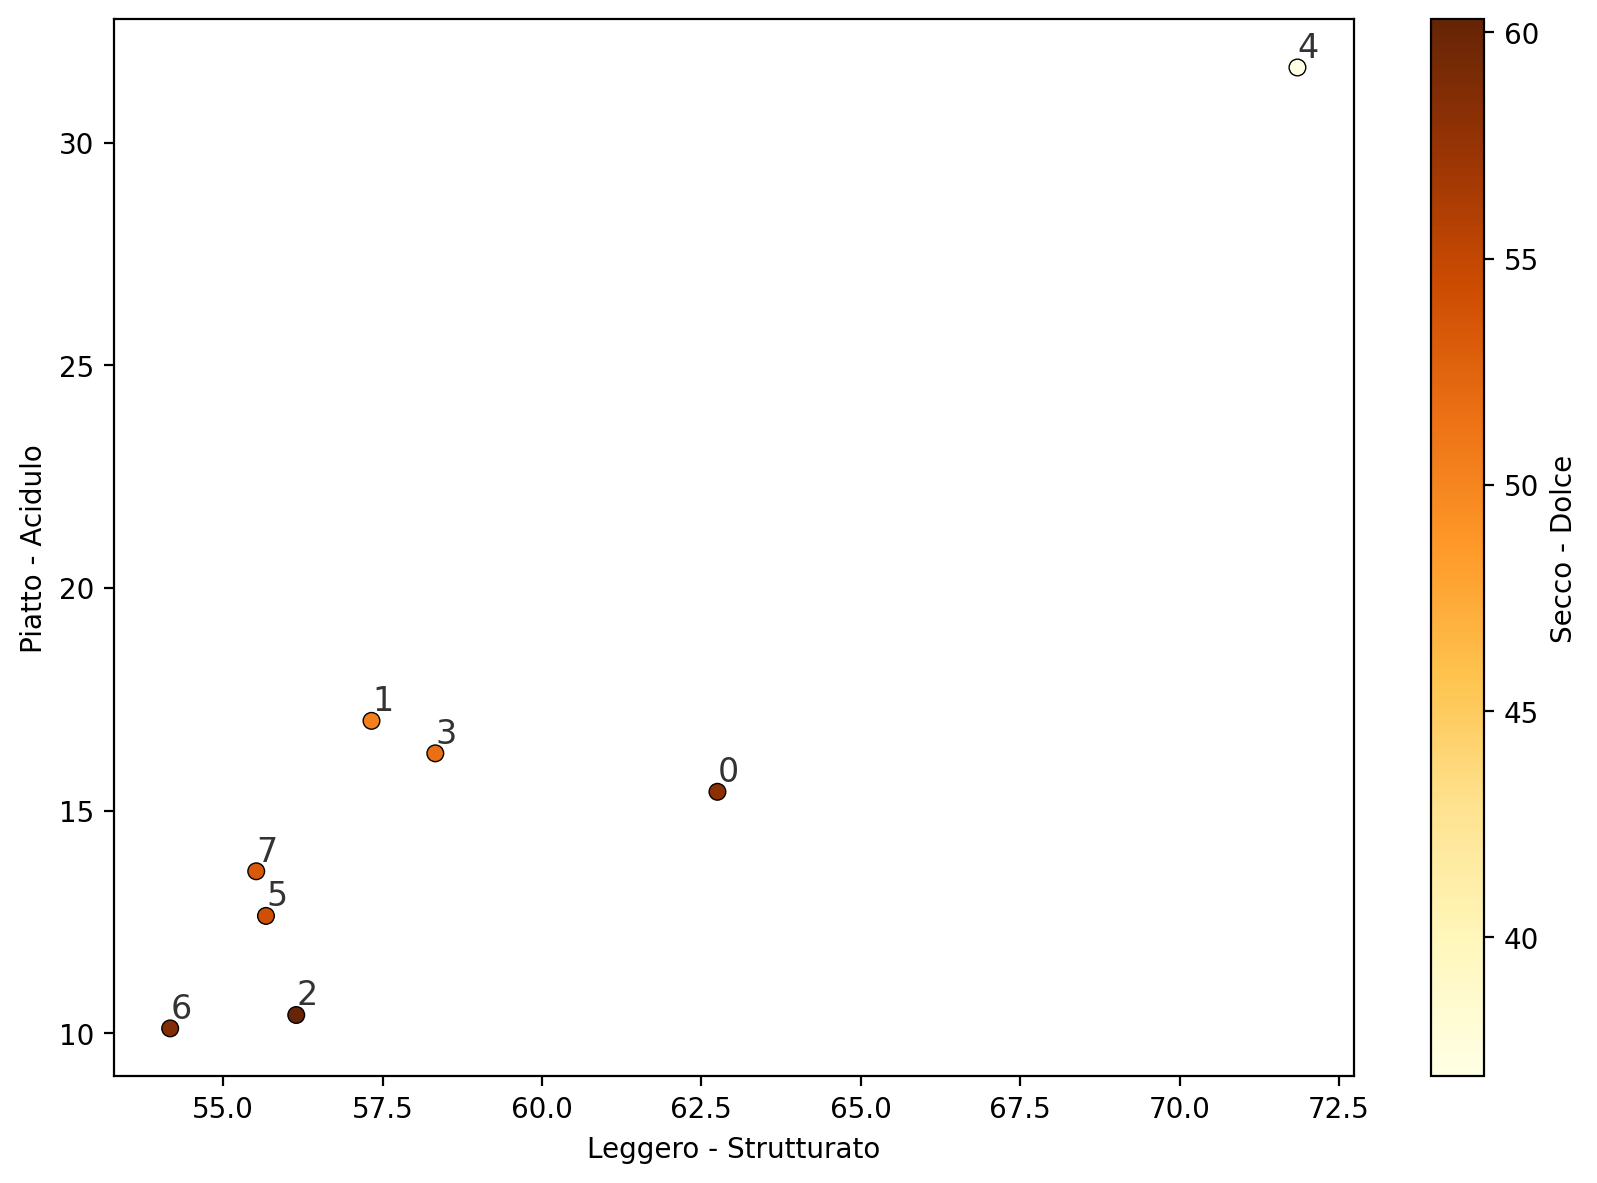

In [ ]:
# Plot wine clusters according structure

fig = plt.figure(figsize=(10,7), dpi=200)
plt.scatter(types_aggr.legg_strutt, types_aggr.piatto_acid, c=types_aggr.secco_dolce, cmap='YlOrBr', edgecolors='black', linewidths=0.5)
plt.xlabel('Leggero - Strutturato')
plt.ylabel('Piatto - Acidulo')
plt.colorbar(label='Secco - Dolce')

texts = []
for idtx, row in types_aggr.iterrows():
    texts.append(plt.annotate(idtx, (row.legg_strutt, row.piatto_acid), fontsize=12, alpha=0.8))
adjust_text(texts)
plt.show()

fig.savefig("cluster_labels_structure.png")
fig.savefig("cluster_labels_structure.svg" ,format="svg")

<AxesSubplot:xlabel='price', ylabel='Clusters'>

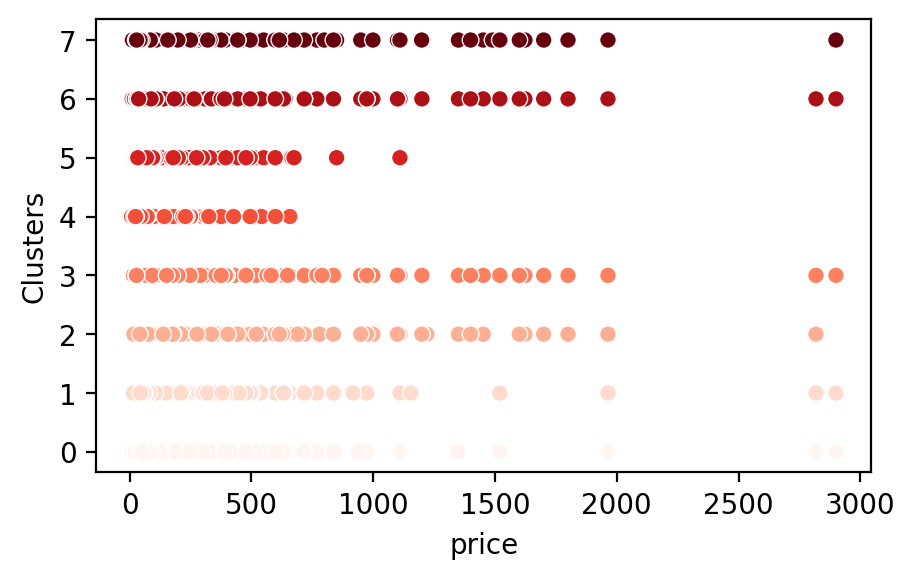

In [ ]:
# Plon on prices

plt.figure(figsize=(5,3), dpi=200)
sns.scatterplot(data=dfinal,x='price', y='Clusters', hue='Clusters', palette='Reds', legend=False)

<AxesSubplot:xlabel='Clusters'>

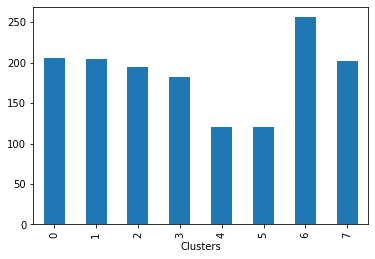

In [ ]:
# Plot on mean price

dfinal.groupby("Clusters")['price'].mean().plot(kind='bar')

In [ ]:
# Number of wines per cluster

dfinal.groupby('Clusters')['Name'].count()

Clusters
0    597 
1    836 
2    761 
3    1122
4    113 
5    655 
6    423 
7    674 
Name: Name, dtype: int64

In [ ]:
# Number of wines per cluster in %

hist, bins = np.histogram(dfinal['Clusters'], bins=range(0, len(set(dfinal['Clusters'])) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f%%)' % (id_cluster, size, (size/len(dfinal))*100))

Cluster 0: 597 (11.52%)
Cluster 1: 836 (16.14%)
Cluster 2: 761 (14.69%)
Cluster 3: 1122 (21.66%)
Cluster 4: 113 (2.18%)
Cluster 5: 655 (12.64%)
Cluster 6: 423 (8.16%)
Cluster 7: 674 (13.01%)


In [ ]:
# Number of wines per prices

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

dfinal['price'].value_counts()

C:\Users\rikk-\AppData\Local\Temp\ipykernel_6884\1632251687.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


85.00      88
49.00      73
170.00     67
336.00     59
66.00      56
69.00      55
95.00      54
135.00     54
79.00      52
49.90      48
50.00      43
59.90      42
55.00      40
39.90      40
53.98      36
59.00      36
76.00      35
45.00      34
427.00     34
47.00      33
99.00      33
199.00     32
54.00      32
51.00      31
161.00     30
376.00     30
143.00     29
393.00     29
64.00      29
45.90      28
152.00     28
179.00     28
180.00     28
108.00     28
119.00     27
74.00      27
44.00      26
318.00     26
230.00     26
129.90     25
40.50      25
41.50      25
169.00     25
41.80      25
70.00      24
598.00     24
110.00     23
255.00     23
48.00      23
283.00     23
42.00      23
1110.00    22
189.00     22
27.90      21
105.00     21
89.00      21
195.00     21
31.00      20
90.00      20
109.00     20
212.00     20
36.00      20
340.00     19
115.00     19
269.00     19
155.00     19
69.90      19
769.00     18
92.00      18
98.00      17
53.50      17
45.50 

In [ ]:
# Cluster composition per wine type

dfinal.groupby('Clusters')['wine_type'].value_counts()

Clusters  wine_type                  
0         Nebbiolo                       241
          Miscela                        129
          Sangiovese                     83 
          Corvina                        35 
          Merlot                         33 
          Cabernet Sauvignon             20 
          Barbera                        10 
          Primitivo                      7  
          Cabernet Franc                 6  
          Sagrantino                     5  
          Montepulciano                  4  
          Negroamaro                     4  
          Aglianico                      2  
          Grenache                       2  
          Nero d'Avola                   2  
          Pinot Nero                     2  
          Shiraz/Syrah                   2  
          Corvina Veronese               1  
          Gaglioppo                      1  
          Lagrein                        1  
          Marzemino                      1  
          Nero di

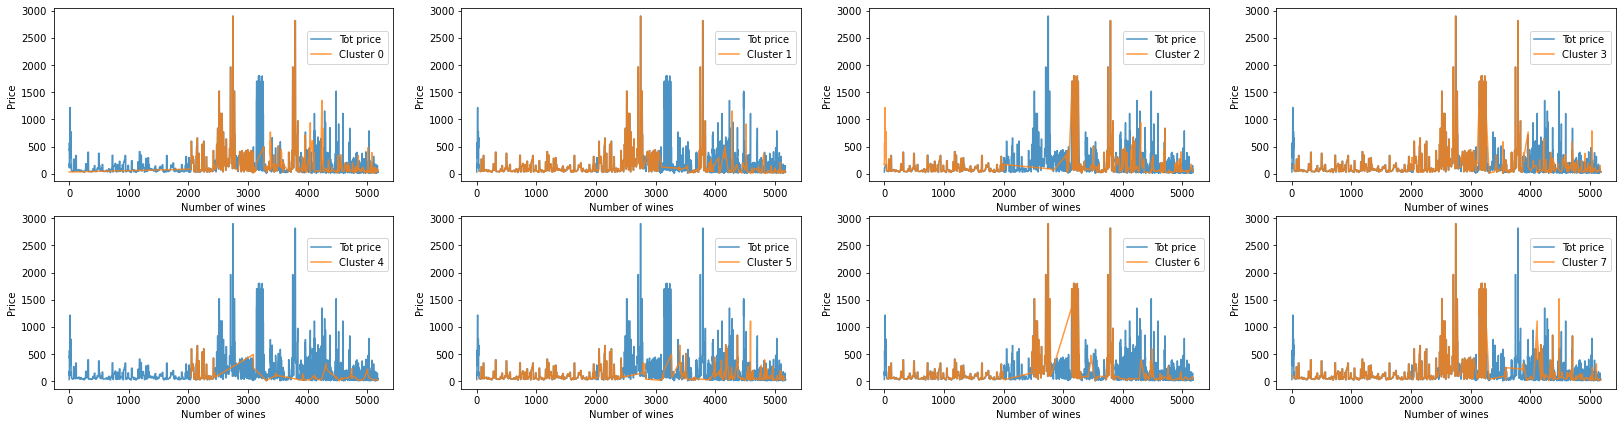

In [ ]:
# Plot prices per cluster

fig = plt.figure(figsize=(28, 7))

rows = 2
columns = 4

fig.add_subplot(rows, columns, 1)

dfinal.groupby(dfinal.Clusters == 0)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 0']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 2)

dfinal.groupby(dfinal.Clusters == 1)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 1']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 3)

dfinal.groupby(dfinal.Clusters == 2)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 2']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 4)

dfinal.groupby(dfinal.Clusters == 3)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 3']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 5)

dfinal.groupby(dfinal.Clusters == 4)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 4']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 6)

dfinal.groupby(dfinal.Clusters == 5)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 5']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 7)

dfinal.groupby(dfinal.Clusters == 6)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 6']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 8)

dfinal.groupby(dfinal.Clusters == 7)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 7']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.savefig("cluster_labels_price.png")
fig.savefig("cluster_labels_price.svg" ,format="svg")



In [ ]:
# Mean price per cluster

dfinal.groupby('Clusters')['price'].mean()

Clusters
0    205.730586
1    204.531926
2    194.182089
3    182.570045
4    120.153009
5    120.340504
6    255.985012
7    202.346217
Name: price, dtype: float64

In [ ]:
# Max price per cluster

dfinal.groupby('Clusters')['price'].max()

Clusters
0    2900.0
1    2900.0
2    2818.0
3    2900.0
4    658.0 
5    1110.0
6    2900.0
7    2900.0
Name: price, dtype: float64

In [ ]:
# Min price per cluster

dfinal.groupby('Clusters')['price'].min()

Clusters
0    10.25
1    7.50 
2    10.50
3    10.40
4    8.20 
5    14.89
6    10.40
7    9.50 
Name: price, dtype: float64

In [ ]:
# Average review value per cluster

dfinal.groupby('Clusters')['avg_review'].mean()

Clusters
0    4.422781
1    4.411483
2    4.394087
3    4.402050
4    4.410619
5    4.375420
6    4.399291
7    4.400593
Name: avg_review, dtype: float64

In [ ]:
# Max review value per cluster

dfinal.groupby('Clusters')['avg_review'].max()

Clusters
0    4.8
1    4.9
2    4.8
3    4.8
4    4.8
5    4.8
6    4.8
7    4.9
Name: avg_review, dtype: float64

In [ ]:
# Min review value per cluster

dfinal.groupby('Clusters')['avg_review'].min()

Clusters
0    4.2
1    4.2
2    4.2
3    4.2
4    4.2
5    4.2
6    4.2
7    4.2
Name: avg_review, dtype: float64

In [ ]:
# Mean structure values per cluster

dfinal.groupby('Clusters')['legg_strutt', 'piatto_acid', 'secco_dolce'].mean()

# Wines from cluster 4 more structured, acid and less dry

C:\Users\rikk-\AppData\Local\Temp\ipykernel_6884\1549871835.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfinal.groupby('Clusters')['legg_strutt', 'piatto_acid', 'secco_dolce'].mean()


,legg_strutt,piatto_acid,secco_dolce
Clusters,,,
0,62.752120,15.422432,58.023577
1,57.326519,17.015292,50.351447
2,56.146625,10.411059,60.282977
3,58.327418,16.285879,51.596001
4,71.848551,31.684088,36.927989
5,55.671576,12.635757,54.139602
6,54.169137,10.110392,58.607726
7,55.518804,13.638068,53.301494


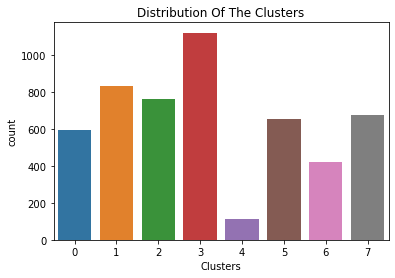

In [ ]:
pl = sns.countplot(x=dfinal["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
dfinal.loc[dfinal['Clusters'] == 4]

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes,Name,Clusters
2044,Tommasi,Amarone della Valpolicella Classico,4.3,2435,84.90,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Miscela,2009,85.0000,23.1936,48.93820,legno/bacche nere/frutti rossi,Amarone della Valpolicella Classico,4
2053,Quintarelli Giuseppe,Amarone della Valpolicella Classico,4.7,494,598.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Miscela,1998,82.7095,25.6376,50.33120,legno/bacche nere/Erbaceo,Amarone della Valpolicella Classico,4
2062,Quintarelli Giuseppe,Amarone della Valpolicella Classico,4.7,475,299.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Corvina,2011,82.7095,25.6376,50.33120,legno/bacche nere/Erbaceo,Amarone della Valpolicella Classico,4
2071,Bertani,Amarone della Valpolicella Classico,4.4,340,195.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Rondinella,1999,83.4356,25.7344,45.39500,legno/frutta secca/Erbaceo,Amarone della Valpolicella Classico,4
2080,Quintarelli Giuseppe,Amarone della Valpolicella Classico,4.7,369,320.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Corvina,2012,82.7095,25.6376,50.33120,legno/bacche nere/Erbaceo,Amarone della Valpolicella Classico,4
2089,Quintarelli Giuseppe,Amarone della Valpolicella Classico,4.8,176,255.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Corvina,2013,82.7095,25.6376,50.33120,legno/bacche nere/Erbaceo,Amarone della Valpolicella Classico,4
2098,Pietro Clementi,Amarone della Valpolicella Classico,4.4,142,39.90,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Miscela,2011,79.3417,36.2835,40.60200,legno/bacche nere/frutti rossi,Amarone della Valpolicella Classico,4
2107,Bertani,Amarone della Valpolicella Classico,4.4,2489,143.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Corvina,2007,83.4356,25.7344,45.39500,legno/frutta secca/Erbaceo,Amarone della Valpolicella Classico,4
2116,Brunelli,Amarone della Valpolicella Classico,4.4,255,41.29,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Miscela,2018,85.0000,22.1723,48.64550,legno/frutti rossi/bacche nere,Amarone della Valpolicella Classico,4
2125,Luciano Arduini,Amarone della Valpolicella Classico,4.4,204,26.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Amarone della Valpolicella Classico,Corvina,2018,84.8620,25.5288,44.80910,legno/frutta secca/frutti rossi,Amarone della Valpolicella Classico,4
